<a href="https://colab.research.google.com/github/AgiletechDev/GrainQ/blob/main/Modelo_Convolucional_RedNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Verifiquemos cuantas imagenes tenemos
!ls /content/drive/MyDrive/granadilla/calidad_1 | wc -l
!ls /content/drive/MyDrive/granadilla/calidad_2 | wc -l
!ls /content/drive/MyDrive/granadilla/extra | wc -l

250
250
250


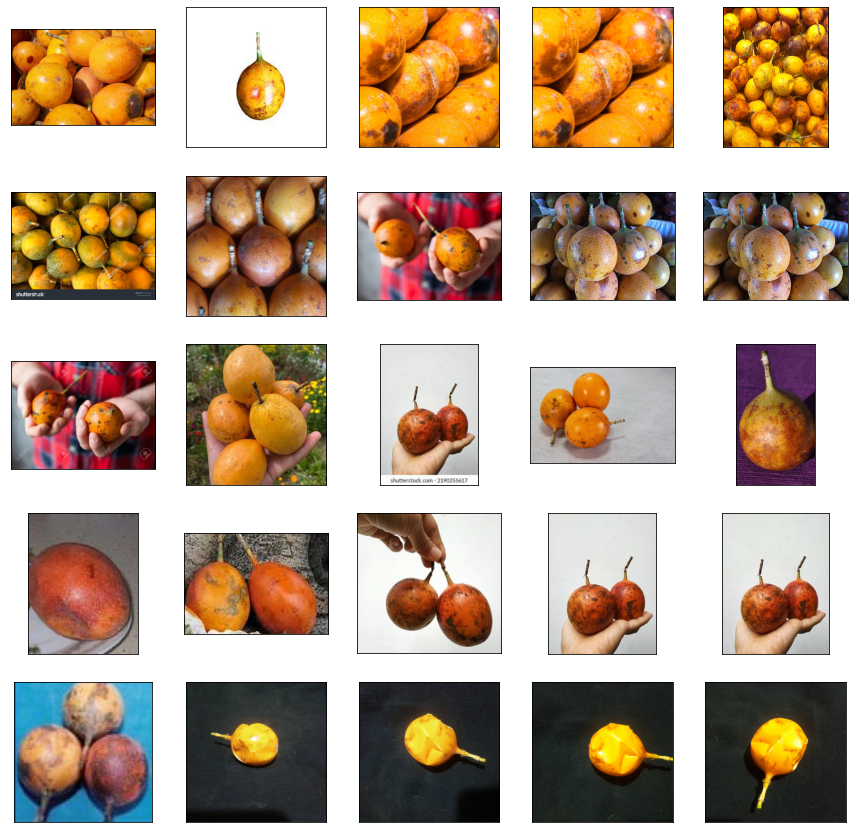

In [2]:
#Mostramos las imagenes de la carpeta
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/drive/MyDrive/granadilla/extra'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen)

In [3]:
#Creamos la carpeta Dataset
!mkdir /content/drive/MyDrive/dataset
!mkdir /content/drive/MyDrive/dataset/calidad_1
!mkdir /content/drive/MyDrive/dataset/calidad_2
!mkdir /content/drive/MyDrive/dataset/extra

mkdir: cannot create directory ‘/content/drive/MyDrive/dataset’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/dataset/calidad_1’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/dataset/calidad_2’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/dataset/extra’: File exists


In [6]:
#Copiar las imagenes en la carpeta Dataset 
#Limitandolo a la misma cantidad de imagenes
# Al menor de las imagenes que se subio 250
import shutil
carpeta_fuente = '/content/drive/MyDrive/granadilla/calidad_1'
carpeta_destino = '/content/drive/MyDrive/dataset/calidad_1'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 250:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [7]:
carpeta_fuente = '/content/drive/MyDrive/granadilla/calidad_2'
carpeta_destino = '/content/drive/MyDrive/dataset/calidad_2'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 250:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [8]:
carpeta_fuente = '/content/drive/MyDrive/granadilla/extra'
carpeta_destino = '/content/drive/MyDrive/dataset/extra'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 250:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [9]:
!ls /content/drive/MyDrive/granadilla/calidad_1 | wc -l
!ls /content/drive/MyDrive/granadilla/calidad_2 | wc -l
!ls /content/drive/MyDrive/granadilla/extra | wc -l

250
250
250


Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


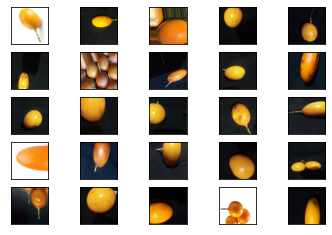

In [22]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2 #20% para pruebas 80% para el entrenamiento
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/drive/MyDrive/dataset', target_size=(224,224),batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/drive/MyDrive/dataset', target_size=(224,224),batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [23]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [24]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [25]:
modelo = tf.keras.Sequential([mobilenetv2, tf.keras.layers.Dense(3, activation='softmax')])

In [26]:
modelo.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_4 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [27]:
#Compilar
modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
#Entrenar el modelo
EPOCAS = 18
historial = modelo.fit(data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,validation_data=data_gen_pruebas)

Epoch 1/18
19/19 [==============================] - 35s 2s/step - loss: 0.8926 - accuracy: 0.5900 - val_loss: 0.7318 - val_accuracy: 0.6467
Epoch 2/18
19/19 [==============================] - 32s 2s/step - loss: 0.5265 - accuracy: 0.7967 - val_loss: 0.6621 - val_accuracy: 0.7333
Epoch 3/18
19/19 [==============================] - 32s 2s/step - loss: 0.4384 - accuracy: 0.8283 - val_loss: 0.5481 - val_accuracy: 0.8000
Epoch 4/18
19/19 [==============================] - 32s 2s/step - loss: 0.3970 - accuracy: 0.8733 - val_loss: 0.5143 - val_accuracy: 0.7933
Epoch 5/18
19/19 [==============================] - 32s 2s/step - loss: 0.3432 - accuracy: 0.8783 - val_loss: 0.4508 - val_accuracy: 0.8333
Epoch 6/18
19/19 [==============================] - 33s 2s/step - loss: 0.3112 - accuracy: 0.8950 - val_loss: 0.4997 - val_accuracy: 0.7333
Epoch 7/18
19/19 [==============================] - 33s 2s/step - loss: 0.3361 - accuracy: 0.8767 - val_loss: 0.4769 - val_accuracy: 0.7933
Epoch 8/18
19/19 [==

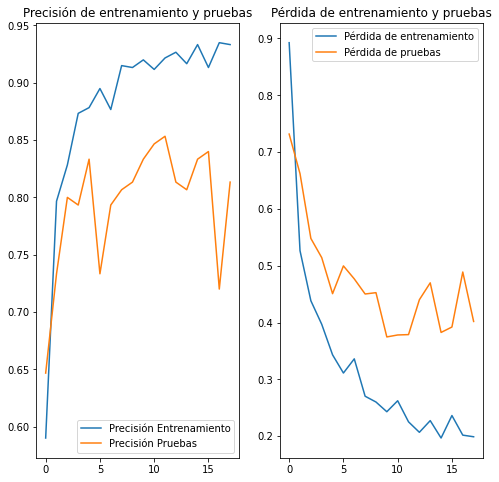

In [31]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(EPOCAS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [32]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [35]:
#0 = calidad_1, 1 = calidad_2, 2 = extra
#url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRI959HOAnnlRm1nRA_toKPjt5SukUeFxeUZz9Y_UD9g-O_1B-NfoSk3llEa0ughYpAVgE&usqp=CAU' #debe ser 0
#url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQpx5RzZhXHsOR-gIwQ9I0JCJ7xuY1HJx27lw&usqp=CAU' #debe ser 1
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTr-BAfVNiTNAhBfdoaH0LwkIOUT6_RlmEoDyDp-DSolq2jd5aBkRQGfOo67YOMqqsgXhE&usqp=CAU' #debe ser 2
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 0s 28ms/step
2


In [37]:
#Guardar el modelo para uso de camara
modelo.save('granadilla_aprendizaje_transferencia.h5')

In [ ]:
!pip install tensorflowjs

In [39]:
!mkdir carpeta_salida

In [40]:
!tensorflowjs_converter --input_format keras granadilla_aprendizaje_transferencia.h5 carpeta_salida

2022-11-09 13:15:32.123829: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-09 13:15:34.077121: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.7/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-11-09 13:15:34.077367: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.7/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-11-09 13:15:34.077397: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you woul